# Task

In a <b>new notebook</b>, use transfer learning to solve an image classification task on the [Cars vs Bikes](https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset) dataset. Please follow the same pipeline we did in this lab (you may copy-paste and reuse codeblocks). You will be graded on the following:

* [3 pt] <b>Dataset:</b>
  * **[1pt]** Downloading and extracting dataset correctly.

  * **[1pt]** Displaying a list of class labels, and visualizing 25 random sample images with their class labels.

  *  **[1pt]**loading the image data from a generator with the correct preprocessing parameters.


* [3 pt] <b>Model:</b>
  * **[1pt]** Choosing and downloading a base model other than the one used in this lab.
  * **[1pt]** Freezing an appropriate number of layers based on the criteria explained in this lab.

  * **[1pt]** Choosing an appropriate optimizer, loss function, and hyperparameters (such as learning rate).

* [1 pt] <b>Training:</b>

  * **[0.5pt]** Learning curves are shown with proper labels for axes and plots. Learning curves show the training and valdiation losses on one graph, and the training and valdiation accuracies on another graph.
  * **[0.5pt]** Learning curves do not show signs of overfitting or underfitting.

* [3 pt] <b>Evaluation:</b>
  * **[2pt]** Test accuracy.
  * **[1pt]** Confusion matrix is displayed (visualized).


<b>Tips & Hints:</b>
  * Do not forget to use the appropriate preprocessing function corresponding to your chosen pre-trained network.

  * the dataset has the train, test and validation sets in separate folders, so create a seperate generator for each with no validation split.
  
  * Use `sklearn.metrics.confusion_matrix` to print the confusion matrix. Be careful that you need to set `shuffle = False` in the test data generator. This is to make sure that the test set will be generated in the same order every time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AssignmentDeepLearning

/content/drive/MyDrive/AssignmentDeepLearning


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '11zjEgM7h-onixqnwvxZV3XWNzEsezxiz'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("archive.zip")

In [ ]:
!mkdir /content/cars_and_bikes/
!unzip -q /content/drive/MyDrive/AssignmentDeepLearning/archive.zip -d /content/cars_and_bikes/

In [ ]:
!pip install split-folders
import os
import random
from glob import glob
from pathlib import Path
from sklearn.model_selection import train_test_split
import splitfolders

DATASET_DIR = "/content/cars_and_bikes/Car-Bike-Dataset"

splitfolders.ratio( DATASET_DIR, output="Splitted", seed=1337, ratio=(.8,0,0.2))
TRAIN_DIR = "/content/drive/MyDrive/AssignmentDeepLearning/Splitted/train"
TEST_DIR = "/content/drive/MyDrive/AssignmentDeepLearning/Splitted/test"


all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]

print(len(all_data))


all_data[:10]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Copying files: 0 files [00:00, ? files/s]
Copying files: 14 files [00:00, 137.20 files/s]
Copying files: 28 files [00:00, 127.59 files/s]
Copying files: 42 files [00:00, 132.53 files/s]
Copying files: 56 files [00:00, 133.06 files/s]
Copying files: 70 files [00:00, 125.55 files/s]
Copying files: 87 files [00:00, 131.96 files/s]
Copying files: 103 files [00:00, 133.71 files/s]
Copying files: 117 files [00:00, 130.35 files/s]
Copying files: 131 files [00:00, 131.78 files/s]
Copying files: 145 files [00:01, 132.72 files/s]
Copying files: 159 files [00:01, 133.80 files/s]
Copying files: 174 files [00:01, 133.01 files/s]
Copying files: 190 files [00:01, 134.63 files/s]
Copying files: 207 files [00:01, 136.41 files/s]
Copying files: 224 files [00:01, 139.62 files/s]
Copying files: 240 files [00:01, 138.33 files/s]
Copying files: 256 files [00:01, 138.43 files/s]
Copying files: 271 files [00:02, 139.89 files/s]
Copying files: 285 files [00:02, 137.86 files/s]
Copying files: 299 files [00:02,

4002


['/content/cars_and_bikes/Car-Bike-Dataset/Bike',
 '/content/cars_and_bikes/Car-Bike-Dataset/Car',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (1534).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (1325).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (56).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (574).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (972).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/images (96).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (447).jpeg',
 '/content/cars_and_bikes/Car-Bike-Dataset/Bike/Bike (848).jpeg']

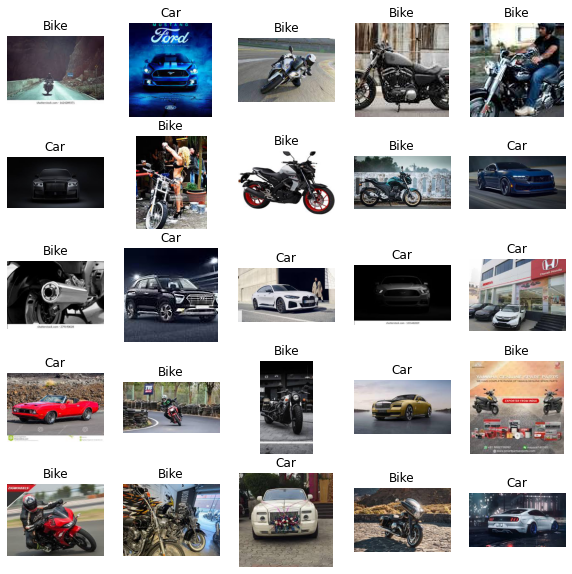

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 200
WIDTH = 200
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
      validation_split = VAL_SPLIT
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 2560 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 640 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle= False,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 800 images belonging to 2 classes.


#Model

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = VGG19(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

# You can choose to fine-tune some of the final layers:
# for layer in base_model.layers[:25]:
#  layer.trainable = False

# You can pick which layers are trainable and which are not:
base_model.get_layer('block1_conv1').trainable = False


# Add new classifier layers
x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 10

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/10
40/40 [==============================] - 55s 1s/step - loss: 0.0571 - accuracy: 0.9953 - val_loss: 0.1766 - val_accuracy: 0.9922
Epoch 2/10
40/40 [==============================] - 55s 1s/step - loss: 0.0601 - accuracy: 0.9969 - val_loss: 0.3292 - val_accuracy: 0.9891
Epoch 3/10
40/40 [==============================] - 65s 2s/step - loss: 0.1036 - accuracy: 0.9953 - val_loss: 0.2263 - val_accuracy: 0.9844
Epoch 4/10
40/40 [==============================] - 54s 1s/step - loss: 0.0387 - accuracy: 0.9984 - val_loss: 0.4162 - val_accuracy: 0.9812
Epoch 5/10
40/40 [==============================] - 54s 1s/step - loss: 0.1079 - accuracy: 0.9957 - val_loss: 0.2435 - val_accuracy: 0.9859
Epoch 6/10
40/40 [==============================] - 55s 1s/step - loss: 0.0633 - accuracy: 0.9965 - val_loss: 0.2838 - val_accuracy: 0.9875
Epoch 7/10
40/40 [==============================] - 66s 2s/step - loss: 0.0290 - accuracy: 0.9980 - val_loss: 0.2038 - val_accuracy: 0.9906
Epoch 8/10
40/40 [==

#Learning Curves

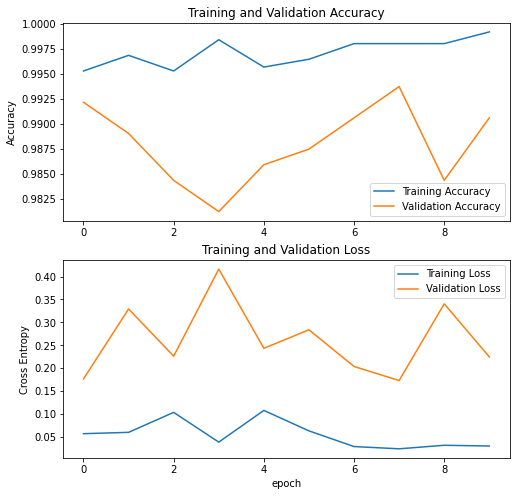

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 8s 617ms/step - loss: 0.0348 - accuracy: 0.9962


[0.03483916446566582, 0.9962499737739563]

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 False
21 block5_pool False


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 16

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  22


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate/10),
            loss='binary_crossentropy',
            metrics=['accuracy'])

for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 False
20 block5_conv4 False
21 block5_pool False
22 flatten True
23 dense True
24 dropout True
25 dense_1 True
26 dense_2 True


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
FINE_TUNE_EPOCHS = 10
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

history_fine = model.fit(train_generator,
                        validation_data = val_generator,
                        initial_epoch=history.epoch[-1], # specify the initial value of epoch to start from when training
                        epochs = TOTAL_EPOCHS)

Epoch 10/20
40/40 [==============================] - 56s 1s/step - loss: 0.0862 - accuracy: 0.9969 - val_loss: 0.2575 - val_accuracy: 0.9828
Epoch 11/20
40/40 [==============================] - 55s 1s/step - loss: 0.0354 - accuracy: 0.9977 - val_loss: 0.3317 - val_accuracy: 0.9859
Epoch 12/20
40/40 [==============================] - 55s 1s/step - loss: 0.0315 - accuracy: 0.9980 - val_loss: 0.5043 - val_accuracy: 0.9828
Epoch 13/20
40/40 [==============================] - 53s 1s/step - loss: 0.0203 - accuracy: 0.9980 - val_loss: 0.3293 - val_accuracy: 0.9891
Epoch 14/20
40/40 [==============================] - 55s 1s/step - loss: 0.0442 - accuracy: 0.9977 - val_loss: 0.2162 - val_accuracy: 0.9891
Epoch 15/20
40/40 [==============================] - 54s 1s/step - loss: 0.0175 - accuracy: 0.9980 - val_loss: 0.4858 - val_accuracy: 0.9844
Epoch 16/20
40/40 [==============================] - 54s 1s/step - loss: 0.0505 - accuracy: 0.9977 - val_loss: 0.3706 - val_accuracy: 0.9844
Epoch 17/20
4

### Learning Curves

We will append the new curves to the old ones so we can visualize the effect of fine-tuning on the graph.

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

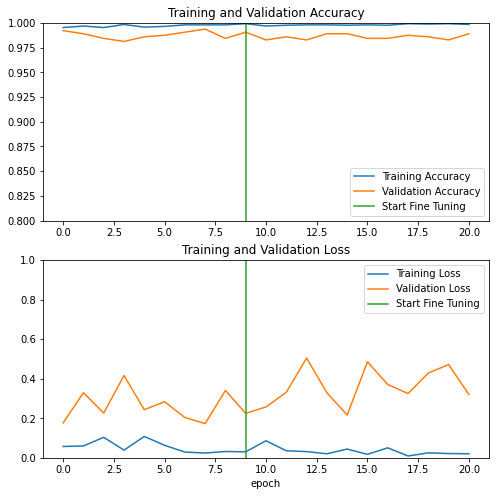

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([INITIAL_EPOCHS-1,INITIAL_EPOCHS-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([INITIAL_EPOCHS-1,INITIAL_EPOCHS-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Evaluation

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 6s 425ms/step - loss: 0.0702 - accuracy: 0.9975


[0.07016289979219437, 0.9975000023841858]

12/13 [==========================>...] - ETA: 0s

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 4s 332ms/step


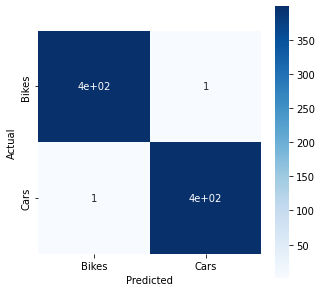

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ypred = model.predict(test_generator)
ypred = np.round(ypred)
ypred = np.argmax(ypred, axis=1)
ytrue = test_generator.classes


cm = confusion_matrix(ytrue, ypred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, xticklabels=['Bikes', 'Cars'], yticklabels=['Bikes', 'Cars'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Bonus**

# Save your fine-tuned model as H5 format into colab local space, and load it again for testing.

##Saving

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/AssignmentDeepLearning/Model',save_format='h5')

In [ ]:
from tensorflow import keras
NewModel = keras.models.load_model('/content/drive/MyDrive/AssignmentDeepLearning/Model')

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 10

history = NewModel.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/10
 5/40 [==>...........................] - ETA: 24s - loss: 0.0139 - accuracy: 1.0000    

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 56s 1s/step - loss: 1240.7766 - accuracy: 0.5660 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
40/40 [==============================] - 55s 1s/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
40/40 [==============================] - 53s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
40/40 [==============================] - 53s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
40/40 [==============================] - 52s 1s/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
40/40 [==============================] - 51s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
40/40 [==============================] - 52s 1s/step - loss: 1.3640 - accuracy: 0.5008 - val_loss: 10.3976 - val_accuracy: 0.5000
Epoch 8/10
40/40 [=========